# Part I - (Ford GoBike Data Exploration)
## by (Ngenoh Kiprotich Nathan)

## Introduction
Ford GoBike dataset for the month of February 2019 contains approximately 183000 trips within California State (Greater Bay area). 



#### Install additional packages

`haversine` package is used to calculate distance between 2 points using latitude and longitude

In [1]:
!pip install haversine

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime
import haversine as hs

%matplotlib inline

## Load Dataset
Import csv data downloaded from Udacity `Communicate Data Findings` dataset link.

In [3]:
trips = pd.read_csv('201902-fordgobike-tripdata.csv', parse_dates=['start_time', 'end_time'])

## Preliminary Wrangling

### Assess data visually and programmatically

From assessment, determine cases of data clean-up and perform the clean-up using the assess, clean (code) and test approach.

## 1. Checking columns data types.
>**NB** Date columns were parsed while importing dataset

`id` columns like `bike_id`, `start_station_id` etc are represented with numeric datatypes (float\integer).

In [4]:
trips.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

### Data type conversion
Convert `id` columns from `float` \ `integer` to `string`


In [5]:
trips[['start_station_id', 'bike_id', 'end_station_id']] = trips[['start_station_id', 'bike_id', 'end_station_id']].astype('str')

### Test 

Confirm that the the columns have the new data types. From the ouput below, the datatypes for these columns are now string. shown as `object`.

In [6]:
trips.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

## 2. Visual inspection by random sampling

Assessing the data visually by using the sampling did not reveal any data issues.

Other data assessing techniques will be employed below. i.e. `programmatic assessment`

In [7]:
trips.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
154726,932,2019-02-06 09:18:14.418,2019-02-06 09:33:46.569,124.0,19th St at Florida St,37.760447,-122.410807,81.0,Berry St at 4th St,37.775880,-122.393170,4834,Subscriber,1990.0,Female,No
65399,1132,2019-02-20 09:29:43.949,2019-02-20 09:48:36.737,118.0,Eureka Valley Recreation Center,37.759177,-122.436943,36.0,Folsom St at 3rd St,37.783830,-122.398870,283,Subscriber,1993.0,Male,No
16438,880,2019-02-27 08:24:14.679,2019-02-27 08:38:55.348,369.0,Hyde St at Post St,37.787349,-122.416651,49.0,S Park St at 3rd St,37.780760,-122.394989,6440,Customer,1989.0,Male,No
17042,441,2019-02-27 07:45:30.197,2019-02-27 07:52:51.611,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,16.0,Steuart St at Market St,37.794130,-122.394430,5570,Subscriber,1997.0,Female,No
125426,159,2019-02-11 07:31:46.454,2019-02-11 07:34:25.724,96.0,Dolores St at 15th St,37.766210,-122.426614,97.0,14th St at Mission St,37.768265,-122.420110,4326,Subscriber,1964.0,Male,No


##  3. Check for nulls in the data

There are null values on `member_birth_year` and `member_gender`.

These can be observed in record count of `Non-Null` column. For the two columns, the value is at `175147` while the rest of te columns have values `183412`



In [8]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

### Investigate Null values

> There are 8265 trips where `year of birth` and `gender` is not provided. This represents approximately 4.6 % of the entire dataset. When using these two columns for analysis, the null values will be ignored.


In [9]:
trips[trips.member_birth_year.isnull()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
13,915,2019-02-28 23:49:06.062,2019-03-01 00:04:21.867,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,5101,Subscriber,NaN,NaN,No
28,650,2019-02-28 23:43:27.503,2019-02-28 23:54:18.451,258.0,University Ave at Oxford St,37.872355,-122.266447,263.0,Channing Way at San Pablo Ave,37.862827,-122.290231,4784,Customer,NaN,NaN,No
53,3418,2019-02-28 22:41:16.362,2019-02-28 23:38:14.363,11.0,Davis St at Jackson St,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,-122.398436,319,Customer,NaN,NaN,No
65,926,2019-02-28 23:17:05.853,2019-02-28 23:32:32.682,13.0,Commercial St at Montgomery St,37.794231,-122.402923,81.0,Berry St at 4th St,37.775880,-122.393170,2951,Subscriber,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183354,449,2019-02-01 01:35:07.663,2019-02-01 01:42:36.878,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,253.0,Haste St at College Ave,37.866418,-122.253799,5430,Customer,NaN,NaN,No
183356,795,2019-02-01 01:25:50.366,2019-02-01 01:39:05.950,368.0,Myrtle St at Polk St,37.785434,-122.419622,125.0,20th St at Bryant St,37.759200,-122.409851,5400,Subscriber,NaN,NaN,No
183363,673,2019-02-01 01:12:24.420,2019-02-01 01:23:37.645,75.0,Market St at Franklin St,37.773793,-122.421239,133.0,Valencia St at 22nd St,37.755213,-122.420975,5166,Customer,NaN,NaN,No
183371,196,2019-02-01 01:08:38.641,2019-02-01 01:11:54.949,58.0,Market St at 10th St,37.776619,-122.417385,75.0,Market St at Franklin St,37.773793,-122.421239,2395,Customer,NaN,NaN,No


In [10]:
trips[trips.member_gender.isnull()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
13,915,2019-02-28 23:49:06.062,2019-03-01 00:04:21.867,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,5101,Subscriber,NaN,NaN,No
28,650,2019-02-28 23:43:27.503,2019-02-28 23:54:18.451,258.0,University Ave at Oxford St,37.872355,-122.266447,263.0,Channing Way at San Pablo Ave,37.862827,-122.290231,4784,Customer,NaN,NaN,No
53,3418,2019-02-28 22:41:16.362,2019-02-28 23:38:14.363,11.0,Davis St at Jackson St,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,-122.398436,319,Customer,NaN,NaN,No
65,926,2019-02-28 23:17:05.853,2019-02-28 23:32:32.682,13.0,Commercial St at Montgomery St,37.794231,-122.402923,81.0,Berry St at 4th St,37.775880,-122.393170,2951,Subscriber,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183354,449,2019-02-01 01:35:07.663,2019-02-01 01:42:36.878,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,253.0,Haste St at College Ave,37.866418,-122.253799,5430,Customer,NaN,NaN,No
183356,795,2019-02-01 01:25:50.366,2019-02-01 01:39:05.950,368.0,Myrtle St at Polk St,37.785434,-122.419622,125.0,20th St at Bryant St,37.759200,-122.409851,5400,Subscriber,NaN,NaN,No
183363,673,2019-02-01 01:12:24.420,2019-02-01 01:23:37.645,75.0,Market St at Franklin St,37.773793,-122.421239,133.0,Valencia St at 22nd St,37.755213,-122.420975,5166,Customer,NaN,NaN,No
183371,196,2019-02-01 01:08:38.641,2019-02-01 01:11:54.949,58.0,Market St at 10th St,37.776619,-122.417385,75.0,Market St at Franklin St,37.773793,-122.421239,2395,Customer,NaN,NaN,No


## 4. Add new columns

- day of the week
- distance between start and end location

### 4.1 Add `day of week`  column

####  Column count before new columns are added

The dataset has 16 columns

In [11]:
trips.shape[1]

16

#### Add Column

Add `day_of_week` column and set the datatype as ordered Categorical 

In [12]:
# Add day of the week
trips['day_of_week'] = trips['start_time'].dt.day_name()


days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

week_days = pd.api.types.CategoricalDtype(ordered=True, categories=days_of_week)

trips['day_of_week'] = trips['day_of_week'].astype(week_days);

#### Confirm  column has been added

There is new column added to the dataset. Column count is 17 from previous 16.

Datatype of the column is shown as `category`

The column has also been ordered as it can be seen below i.e. `Monday < Tuesday`etc.

In [13]:
print('Column count : ' + str(trips.shape[1]))
print('data type : ' + str(trips.day_of_week.dtype))

trips.day_of_week.unique()

Column count : 17
data type : category


['Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Sunday', 'Saturday', 'Friday']
Categories (7, object): ['Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday' < 'Sunday']

### 4.2 Calculate distance between `start station` and `end_station`

The distance returned by `haversine` package is in Kilometres. This is an approximation, in real world, the are multiple factors that affect distance i.e.:
>- route taken
>- curves and detours of the infrastructure (roads, bike lanes etc).
>- members might not go directly to the destination station.
>- There are instances where start and end destination is the same. In this case, distance will be zero.

In [14]:
trips['start_location_coordinates'] = trips[['start_station_latitude', 'start_station_longitude']].apply(tuple, axis=1)
trips['end_location_coordinates'] = trips[['end_station_latitude', 'end_station_longitude']].apply(tuple, axis=1)


for index, row in trips.iterrows():
    trips.loc[index, 'distance_km'] = hs.haversine(row.start_location_coordinates, row.end_location_coordinates)
    
    
# Drop temporary coordinates columns
trips.drop(columns=['start_location_coordinates', 'end_location_coordinates'], inplace=True)

#### Check that new columns have been added

From the data below, we can observe that the two additonal columns (`day_of_week` and `distance_km`) have been added to the end of the dataframe

In [15]:
trips.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,day_of_week,distance_km
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,Thursday,0.544709
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,Thursday,1.743002
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,Thursday,2.704549
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,Thursday,0.260739
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,Thursday,2.409305


#### Check column count

After addition of `distance_km` column, the dataset has a total of 18 columns

In [16]:
trips.shape

(183412, 18)

In [17]:
trips[['duration_sec', 'member_birth_year', 'distance_km']].describe()

,duration_sec,member_birth_year,distance_km
count,183412.000000,175147.000000,183412.000000
mean,726.078435,1984.806437,1.690661
std,1794.389780,10.116689,1.097591
min,61.000000,1878.000000,0.000000
25%,325.000000,1980.000000,0.910957
50%,514.000000,1987.000000,1.430740
75%,796.000000,1992.000000,2.225690
max,85444.000000,2001.000000,69.469337


### Same start and end stations
There are 3880 trips with same start and end stations. This represents approximately 2.1 percent of the dataset.

Given that these trips have atleast one minute duration (`min of 61 seconds`), mean of non zero trips will be used to estimate the distance the bikes could have covered over the duration.

#### Count trips with zero distance

In [18]:
trips[trips.distance_km == 0].distance_km.count()

3880

In [19]:
trips[trips.distance_km == 0].duration_sec.describe()

count     3880.000000
mean      1970.280670
std       4882.242228
min         61.000000
25%        284.750000
50%        999.500000
75%       2070.000000
max      82385.000000
Name: duration_sec, dtype: float64

#### Replace `zero` distance with mean.

`mean` to be used excludes trips with zero values.

In [20]:
avg = trips[trips.distance_km != 0].distance_km.mean()
trips.distance_km.replace(0,avg,inplace=True )

#### Test
From the below, all distances have values greater than zero

In [21]:
trips[trips.distance_km == 0].head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,day_of_week,distance_km


### Dataset structure

> GoBike dataset contains 183412 rows and 18 columns. Two additional columns were added (`day_of_week` and `distance`)

### Main feature(s)

> I will be exploring this dataset with the aim of identfying which day of the week or time of the day is busiest or not busy at all. This information will be help in scheduling bike repairs/maintainance.

> In relation to the above, get list of most used bikes using the bike id. This can help when scheduling bikes for maintenance. Frequently used bikes should be maintained often in comparison to bikes 

### Features of  the dataset to be used

> To be able to perform analysis to answer the question above, the following features will be used:
>>- duration_sec
>>- start_time
>>- start_station_name
>>- end_station_name
>>- bike_id
>>- user_type
>>- member_birth_year
>>- member_gender
>>- bike_share_for_all_trip
>>- day_of_week
>>- distance_km

### Functions

In [22]:
def document_plots(title: str, x: str, y: str):
    """
        Add Title, xlabel and ylabel to a chart.
        
        Attributes:
            title (string): Title of the chart
            x(string): xlabel for the chart
            y(string): ylabel for the chart
    """
    
    plt.title('{}'.format(title))
    plt.xlabel('{}'.format(x))
    plt.ylabel('{}'.format(y))
    
    

# Univariate Exploration

## 1. Birth Year

### Default Histogram

The normal histogram is skewed to the right with majority of rides taken by members born between `1980` and `2000`


### Transformed Histogram

The histogram on the right has outliers removed by setting the minimum birth year to `1960`. From the histogram we can conclude that majority of frequent riders were born between 1987 and 1997

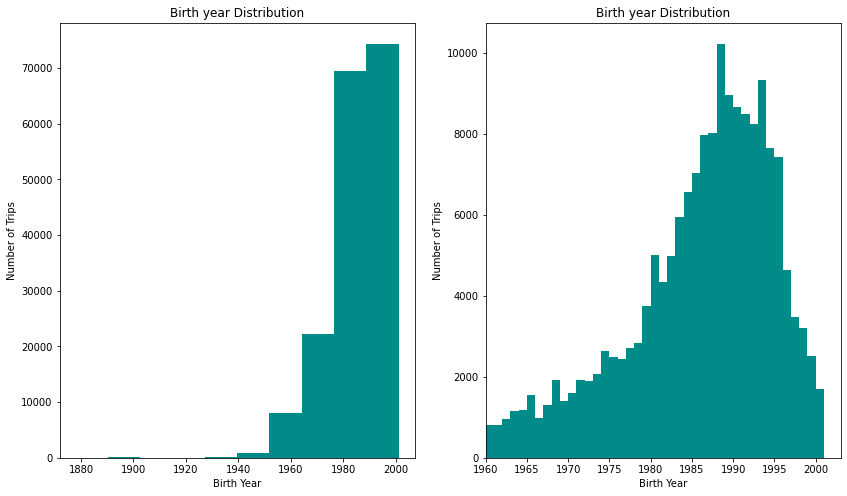

In [23]:
plt.figure(figsize=(14,8))

plt.subplot(1,2,1)
plt.hist(data=trips, x='member_birth_year',color='darkcyan')
document_plots(title='Birth year Distribution', x='Birth Year', y='Number of Trips');

plt.subplot(1,2,2)
bins = np.arange(1960,trips.member_birth_year.max()+1, 1)
plt.hist(data=trips, x='member_birth_year',color='darkcyan', bins=bins)
plt.xlim(xmin=1960)
document_plots(title='Birth year Distribution', x='Birth Year', y='Number of Trips');

## 2. Duration exploration

### Default Histogram

The default histogram is skewed to the left and it becomes 

### Transformed Histogram
Lower and upper limits have been set to 0 and 1500 respectively. The histogram on the right depicts a fairly distributed data points which allows us to see peak usage duration which is between 300 and 600 seconds( 5 to 10 mins)

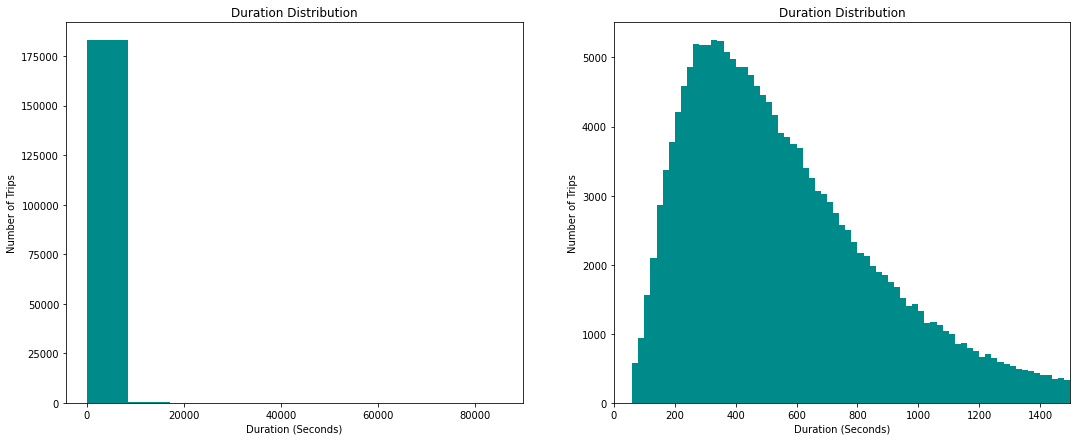

In [24]:

plt.figure(figsize=(18,7))

plt.subplot(1,2,1)
plt.hist(data=trips, x='duration_sec',color='darkcyan')
document_plots(title='Duration Distribution', x='Duration (Seconds)', y='Number of Trips');

plt.subplot(1,2,2)
bins = np.arange(0,trips.member_birth_year.max()+20, 20)
plt.hist(data=trips, x='duration_sec',color='darkcyan', bins=bins)
plt.xlim(xmax=1500)
plt.xlim(xmin=0)
document_plots(title='Duration Distribution', x='Duration (Seconds)', y='Number of Trips');

## 3. Distance exploration

### Default Histogram
Default Histogram is left skewed

### Transformed Histogram

Fairly balanced histogram is achieved by setting upper limit 7.
Majority of trips is between stations with a distance of between 1 and 2.3 kms.
>**NB** Please note raised concerns on distance measurements

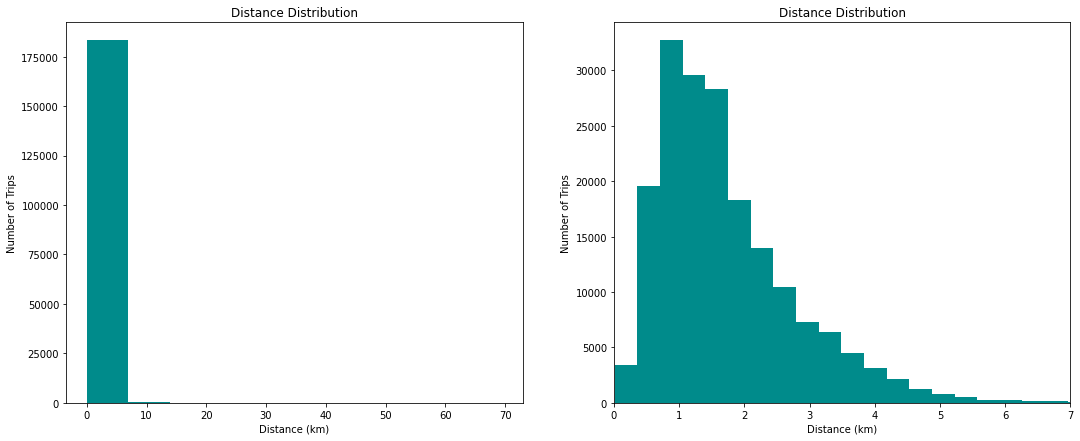

In [25]:
plt.figure(figsize=(18,7))

plt.subplot(1,2,1)
plt.hist(data=trips, x='distance_km',color='darkcyan')
document_plots(title='Distance Distribution', x='Distance (km)', y='Number of Trips');


plt.subplot(1,2,2)
plt.hist(data=trips, x='distance_km',color='darkcyan', bins=200)
plt.xlim(xmax=7)
plt.xlim(xmin=0)
document_plots(title='Distance Distribution', x='Distance (km)', y='Number of Trips');

##  4. Week day distibution

The data across weekdays is fairly distributed across different weekdays with low number of trips across the weekend

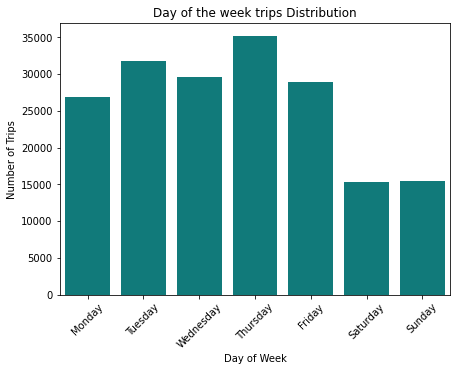

In [26]:
plt.figure(figsize=(7,5))
sb.countplot(data=trips, x='day_of_week', color='darkcyan')
plt.xticks(rotation=45)
document_plots(title='Day of the week trips Distribution', x='Day of Week', y='Number of Trips');

## 5. Time of day Distribution

#### Weekday

Trips distribution across 24 hour period during **weekday** is fairly distributed with peak hours corresponding to office reporting and leaving times i.e. office start time (`7am to 9 am`) and office closing time (`4pm to 6pm`)

#### Weekend

During the weekend, peak usage starts at mid-morning to evening.

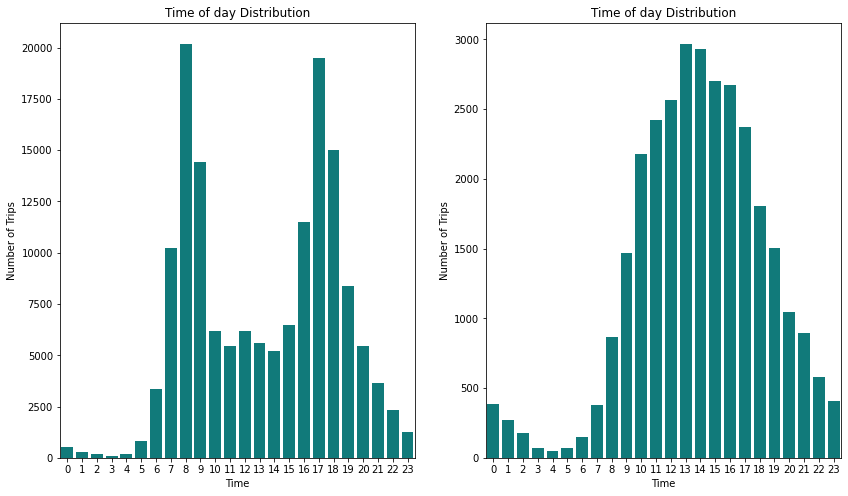

In [27]:
plt.figure(figsize=[14,8])

# Weekday Time of day distribution
plt.subplot(1,2,1)
sb.countplot(
                data=trips[trips.start_time.dt.weekday <= 4],
                x=trips[trips.start_time.dt.weekday <= 4].start_time.dt.hour,
                color='darkcyan'
            )
document_plots(title='Time of day Distribution', x='Time', y='Number of Trips');


# Weekend time of day distribution
plt.subplot(1,2,2)
sb.countplot(
                data=trips[trips.start_time.dt.weekday >= 5],
                x=trips[trips.start_time.dt.weekday >= 5].start_time.dt.hour,
                color='darkcyan'
            )
document_plots(title='Time of day Distribution', x='Time', y='Number of Trips');

##  6. Top 10 start stations

From the plot below, in the month of february 2019, `Market St at 10th St` station had the highest number of trips starting at the station

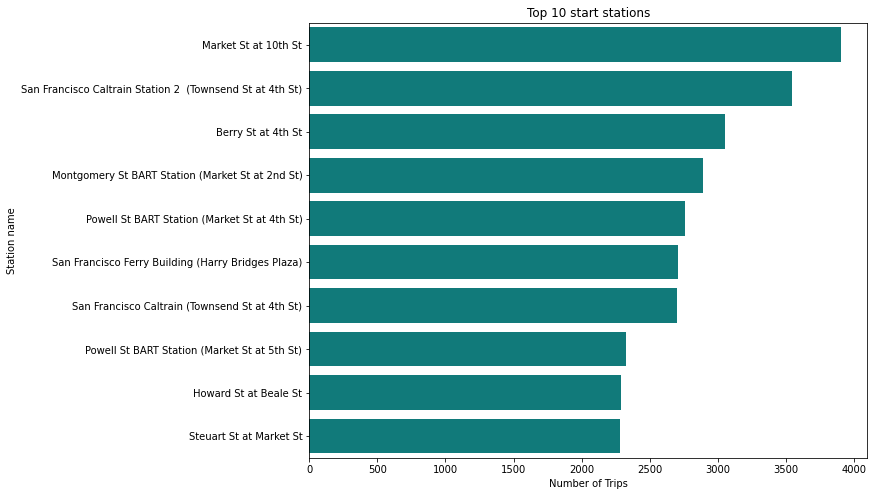

In [28]:
top_10_start_stations = trips['start_station_name'].value_counts().head(10).reset_index()
top_10_start_stations.columns = ['start_station', 'trips']

plt.figure(figsize=(10,8))

sb.barplot(data=top_10_start_stations, y='start_station', x='trips', color='darkcyan')
document_plots(title='Top 10 start stations', x='Number of Trips', y='Station name');

## 7. Top 10 destination stations

The chart below shows top 10 destination station.

In comparison to `Top 10 start stations` chart above, we can conclude that `Market St at 10th St` and `San Francisco Caltrain Station 2 (Townsend st at 4th st)` are the busiest stations both as destination and as start stations

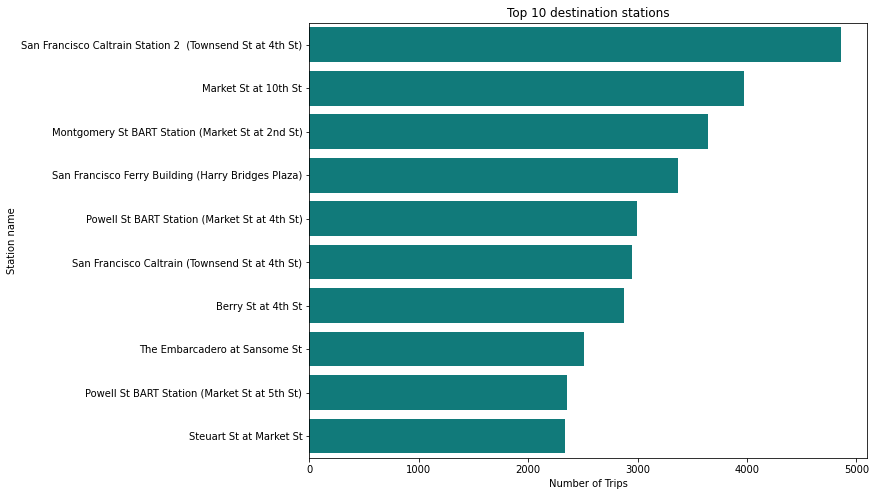

In [29]:
top_10_dest_stations = trips['end_station_name'].value_counts().head(10).reset_index()
top_10_dest_stations.columns = ['destination_station', 'trips']

plt.figure(figsize=(10,8))
sb.barplot(data=top_10_dest_stations, y='destination_station', x='trips', color='darkcyan')
document_plots(title='Top 10 destination stations', x='Number of Trips', y='Station name');

## 8. Top 20 used bikes

The graph below shows top 20 used bikes with the red line showing the average number of trips of all bikes.

These demonstrate that these bikes have more than twice more trips in comparison to average trips.

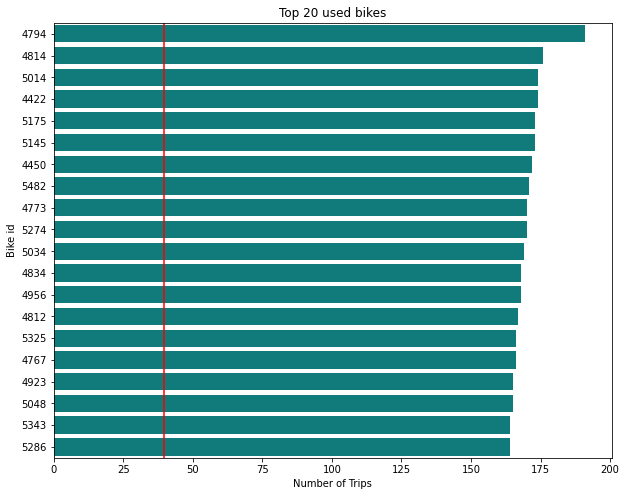

In [30]:
top_20_used_bikes = trips['bike_id'].value_counts().head(20).reset_index()
top_20_used_bikes.columns = ['bike_id', 'trips']

plt.figure(figsize=(10,8))

sb.barplot(data=top_20_used_bikes, y='bike_id', x='trips', color='darkcyan')

# Average trips of all bikes
plt.axvline(x=trips['bike_id'].value_counts().mean(), color='red')
document_plots(title='Top 20 used bikes', x='Number of Trips', y='Bike id');

### Distribution


#### Normal Distribution

Normal data distribution was witnessed in the features below:

- Time of day distribution
- Day of week distribution

The normal charts were not corrected.


#### Skewed Distribution

- **Birth year**

Birth year was skewed to the right and modifications below were done:

  >- Minimum year was set to 1960
  >- Bin size was increased from 10 to the difference between maximum year `2001` with a spacing of **one** year
   
- **Time taken**

Left skewed.

To correct skew and expose underlying insights, the below were done:

  >- Maximum limit on time was set to 1500 seconds (approximately 25mins)
  >- Bins spacing was set at interval of 20 seconds starting 0

- **Distance**

Left skewed.

Below activities were done to correct skew:

  >- Maximum distance was set to 7 kms
  >- Bins size was changed from 10 bins to 200 bins


# Bivariate Exploration


### Distance covered by riders of different age groups

Riders born after the year `1955` take longer trips (greater distance) and in high frequency.

Between the year `1960` and `2001`, there is a slight increase in number of trips taken and the distance covered.

Majority of trips are for distances less than `six` kilometres

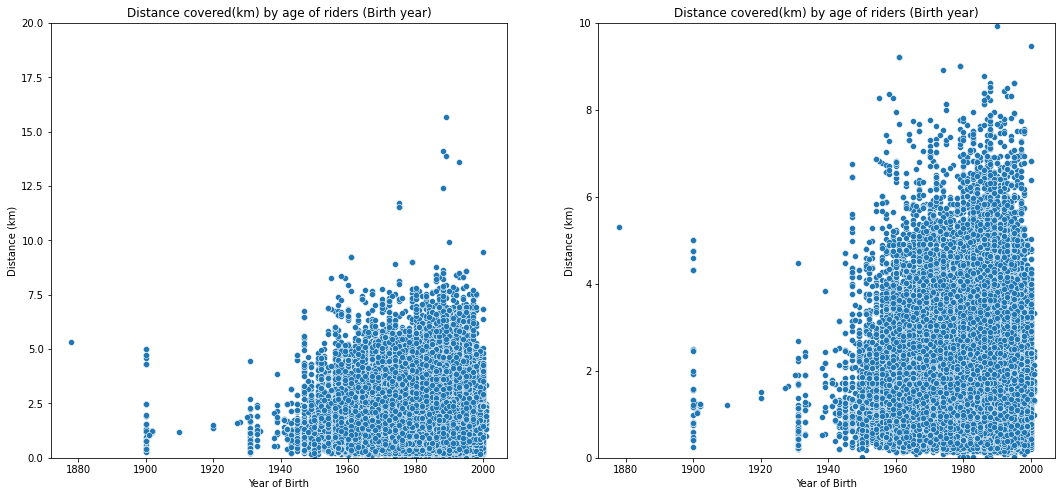

In [31]:
plt.figure(figsize=(18,8))

plt.subplot(1,2,1)
plt.ylim(ymax=20)
sb.scatterplot(data=trips, x='member_birth_year', y='distance_km')
document_plots(title='Distance covered(km) by age of riders (Birth year)', x='Year of Birth', y='Distance (km)');


'''
    Limiting the distance to 10 kilomteres to zoom in on 
    clustered distances when maximum distance is set to 20
'''
plt.subplot(1,2,2)
plt.ylim(ymax=10)
sb.scatterplot(data=trips, x='member_birth_year', y='distance_km')
document_plots(title='Distance covered(km) by age of riders (Birth year)', x='Year of Birth', y='Distance (km)');

### Duration of rides per different age groups

As age of riders increases, the duration of rides is reduced.

From the charts below, riders born after `1970` tend to ride longer in comparison to riders born before `1970`.

We can also conclude that younger riders takes trips often.

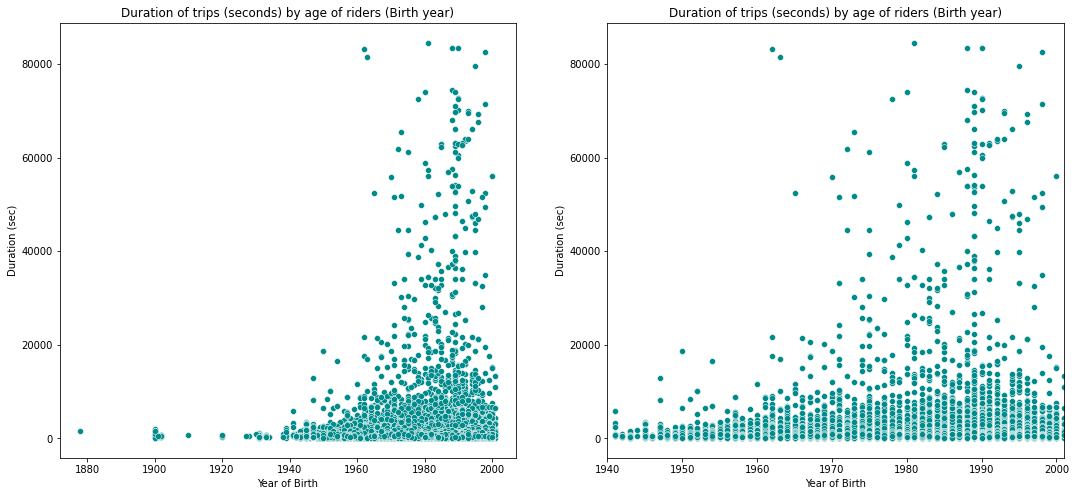

In [32]:
plt.figure(figsize=(18,8))

plt.subplot(1,2,1)
sb.scatterplot(data=trips, x='member_birth_year', y='duration_sec', color='darkcyan')
document_plots(title='Duration of trips (seconds) by age of riders (Birth year)', x='Year of Birth', y='Duration (sec)');

plt.subplot(1,2,2)
plt.xlim(xmin=1940)
plt.xlim(xmax=2001)
sb.scatterplot(data=trips, x='member_birth_year', y='duration_sec', color='darkcyan')
document_plots(title='Duration of trips (seconds) by age of riders (Birth year)', x='Year of Birth', y='Duration (sec)');

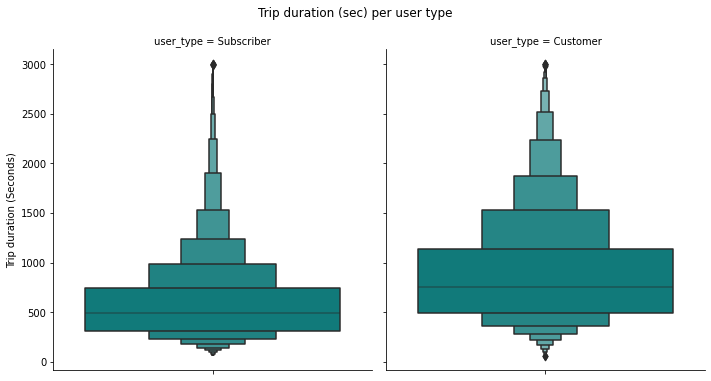

In [33]:
ax = sb.catplot(data=trips[trips.duration_sec <= 3000], y='duration_sec', col="user_type", kind='boxen', color = 'darkcyan')
ax.set_axis_labels("", 'Trip duration (Seconds)')
ax.fig.suptitle('Trip duration (sec) per user type', y=1.05);

Boxenplot above indicates that customers spend much time on trips compared to subscribers

## Multivariate Exploration

### Gender, user type and distance

Across all genders, customers tend to ride longer distances in comparison to subscriber.



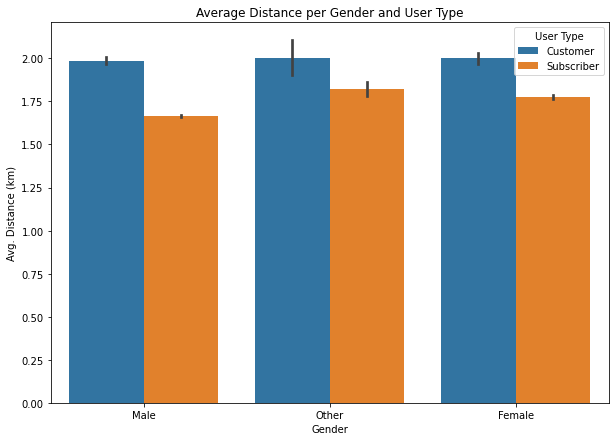

In [34]:
plt.figure(figsize=(10,7))

sb.barplot(data=trips, x='member_gender', y='distance_km', hue='user_type')
document_plots(title='Average Distance per Gender and User Type', x='Gender', y='Avg. Distance (km)');
plt.legend(title='User Type');

#### Distance and Time comparison
Whenever there is no bike share for all trip, riders tend to ride for short distances but spend a lot of time on these trips. In the contrary, trips with bike share for all trip tend to cover long distance over a short period of time.


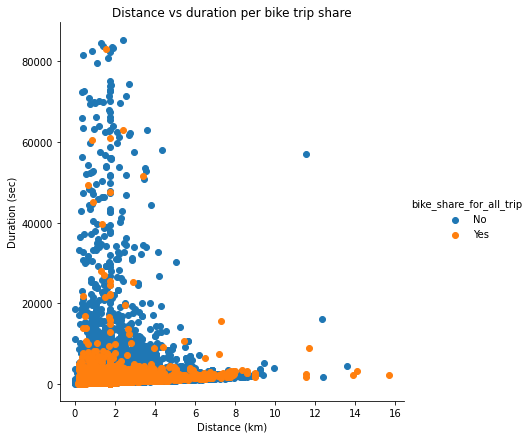

In [35]:
g = sb.FacetGrid(data = trips[trips.distance_km < 50], hue = 'bike_share_for_all_trip', height = 6)
g.map(plt.scatter, 'distance_km', 'duration_sec')
document_plots(title='Distance vs duration per bike trip share', x='Distance (km)', y='Duration (sec)');
g.add_legend();

#### Distance, Duration, Gender and user type

Male riders both customer and subscriber tend to ride for extended periods in comparison to other genders (`other` and `female`).

Majority of trips taken cover short distances (`0-4 km` ) and over a short period of time i.e. less than `5000` seconds.


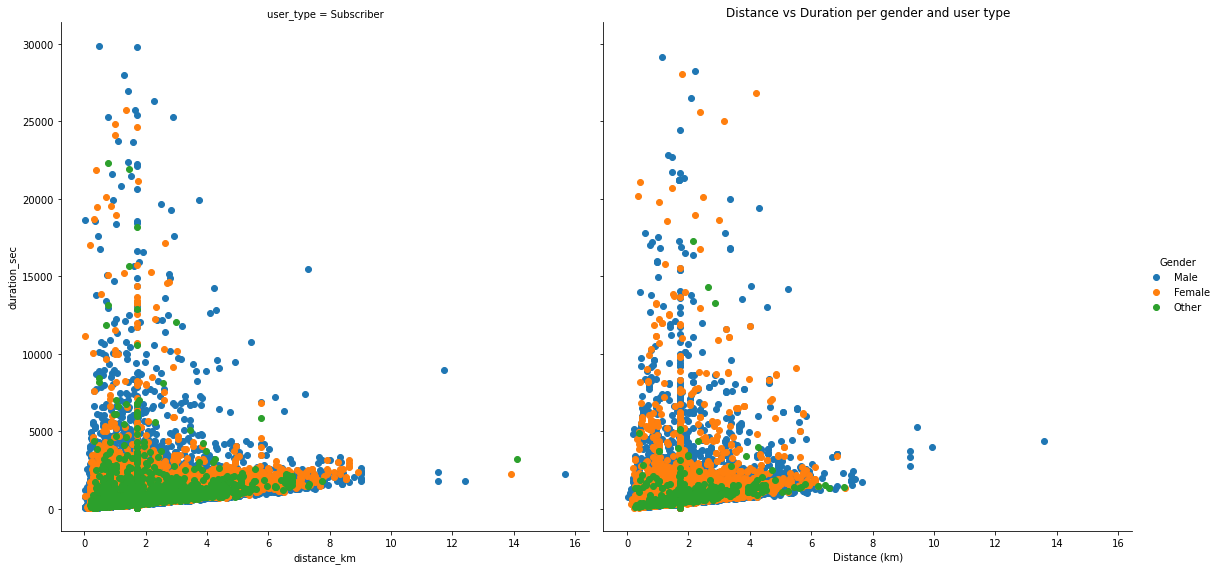

In [36]:
g = sb.FacetGrid(data = trips.query('distance_km < 20 & duration_sec < 30000 '), col='user_type', hue = 'member_gender', height = 8)
g.map(plt.scatter, 'distance_km', 'duration_sec')
g.add_legend(title='Gender')
document_plots(title='Distance vs Duration per gender and user type', x='Distance (km)', y='Duration (sec)');

#### Trip count, gender and bike share

Overally, there are more trips taken by Male riders.

Across all genders, majority of trips involve no bike share for all trip

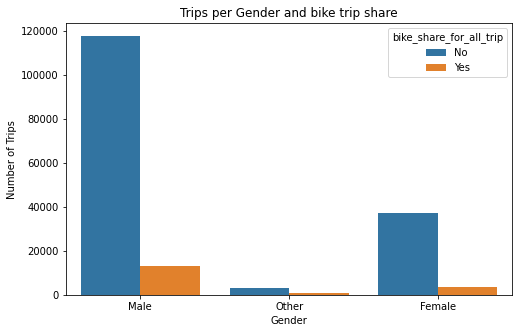

In [37]:
plt.figure(figsize=(8,5))
g = sb.countplot(data = trips, x = 'member_gender', hue='bike_share_for_all_trip')
# g.set(title='Trips per Gender and bike trip share')
document_plots(title='Trips per Gender and bike trip share', x='Gender', y='Number of Trips')

## Conclusions

Male riders take bike trips more than twice the rate of other gender.

There are very few trips over the weekend in comparison to weekday. Bike Maintenance should be done over the weekends preferably early morning or late evening.

During weekdays, concentration of bike trips happens in the morning (between `7:00 AM and 9:00AM`) and in the evening (between `4:00PM and 6:00PM`). This is an indication that majority of bike riders (trips) use bikes to commute from home to work and from work to home. There is a noticeable decreased bike usage on weekdays between `10:00AM and 3:00PM`. Emergency bike maintenance can then be scheduled between `10:00AM and 3:00PM` on weekdays and anytime on weekends.

With exception of `Howard St at Beale St` and `The Embarcadero at Sansome St` stations, the top 10 start and destination stations features the same stations. i.e. These stations are both top as start stations and also top as destination stations.This validates the assumption that majority of trips are used for work commute. Riders start from one station in the morning and it becomes destination in the evening and vice versa for workers doing night shift.



## References
1. [Calculating distance between two geo-locations in Python by `Ashutosh Bhardwaj` ](https://towardsdatascience.com/calculating-distance-between-two-geolocations-in-python-26ad3afe287b)
2. [haversine pypi documentation](https://pypi.org/project/haversine/)
3. [Building structured multi-plot grids](https://seaborn.pydata.org/tutorial/axis_grids.html#grid-tutorial)
4. [Seaborn Boxenplot](https://seaborn.pydata.org/generated/seaborn.boxenplot.html#seaborn.boxenplot)